In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Supreme Court.csv')
df

,user_country,source,content,date
0,"Charleston, SC",Twitter for iPhone,@RBReich The participation by any judge to be ...,2020-10-22T23:59:56+00:00
1,New Zealand,Twitter for iPhone,"@JohnCornyn Imagine after being a lawyer, an A...",2020-10-22T23:59:53+00:00
2,Texas,Twitter for Android,"Read and listen....over 7,000 lawyers OPPOSE A...",2020-10-22T23:59:49+00:00
3,"Pittsburgh, Pennsylvania",Twitter for iPhone,Tell your senators you oppose Trump's Supreme ...,2020-10-22T23:59:44+00:00
4,"Downeast Maine, USA",Twitter Web App,@SenatorCollins signed an Amicus brief asking ...,2020-10-22T23:59:37+00:00
...,...,...,...,...
1995,NaN,Twitter for iPhone,Sotomayor Tears into 5-3 Supreme Court Decisio...,2020-10-22T22:24:19+00:00
1996,"Dallas, TX",Twitter for iPhone,@realDonaldTrump Sad day for America. A Suprem...,2020-10-22T22:24:17+00:00
1997,Bucks County PA,Twitter for iPhone,"Next to Trump losing, what is the one thing th...",2020-10-22T22:24:16+00:00
1998,NaN,Twitter Web App,"@michaelharriot Trump: ""I hope that they end i...",2020-10-22T22:24:14+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

65734
['@rbreich', 'the', 'participation', 'by', 'any', 'judge', 'to', 'be', 'a', 'part', 'of', 'an', 'appointment', 'to', 'a', 'supreme', 'court', 'bench', 'seat', 'in']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 192.00%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

30442
['participation', 'judge', 'part', 'appointment', 'supreme', 'court', 'bench', 'seat', 'way', 'confirmation', 'judge', 'integrity', 'imagine', 'lawyer', 'judge', 'senior', 'member', 'senate', 'ending', 'career']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@nrdc_af', 111),
 ('@realdonaldtrump', 55),
 ('@joebiden', 41),
 ('@johncornyn', 30),
 ('@senschumer', 23),
 ('@senatemajldr', 23),
 ('@lindseygrahamsc', 17),
 ('@gop', 15),
 ('@thehill', 14),
 ('@abc', 14),
 ('@mittromney', 11),
 ('@youtube', 11),
 ('@kamalaharris', 11),
 ('@chuckgrassley', 10),
 ('@60minutes', 9),
 ('@senrobportman', 9),
 ('@saltlaketribbrk', 9),
 ('@standardex', 9),
 ('@dailyherald', 9),
 ('@lwvutah', 9)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,"Charleston, SC",Twitter for iPhone,@RBReich The participation by any judge to be ...,2020-10-22T23:59:56+00:00,Neutral
1,New Zealand,Twitter for iPhone,"@JohnCornyn Imagine after being a lawyer, an A...",2020-10-22T23:59:53+00:00,Neutral
2,Texas,Twitter for Android,"Read and listen....over 7,000 lawyers OPPOSE A...",2020-10-22T23:59:49+00:00,Neutral
3,"Pittsburgh, Pennsylvania",Twitter for iPhone,Tell your senators you oppose Trump's Supreme ...,2020-10-22T23:59:44+00:00,Positive
4,"Downeast Maine, USA",Twitter Web App,@SenatorCollins signed an Amicus brief asking ...,2020-10-22T23:59:37+00:00,Neutral
...,...,...,...,...,...
1995,NaN,Twitter for iPhone,Sotomayor Tears into 5-3 Supreme Court Decisio...,2020-10-22T22:24:19+00:00,Neutral
1996,"Dallas, TX",Twitter for iPhone,@realDonaldTrump Sad day for America. A Suprem...,2020-10-22T22:24:17+00:00,Negative
1997,Bucks County PA,Twitter for iPhone,"Next to Trump losing, what is the one thing th...",2020-10-22T22:24:16+00:00,Negative
1998,NaN,Twitter Web App,"@michaelharriot Trump: ""I hope that they end i...",2020-10-22T22:24:14+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    942
Neutral     680
Negative    378
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 47.10%
Percentage of neutral tweets: 34.00%
Percentage of negative tweets: 18.90%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

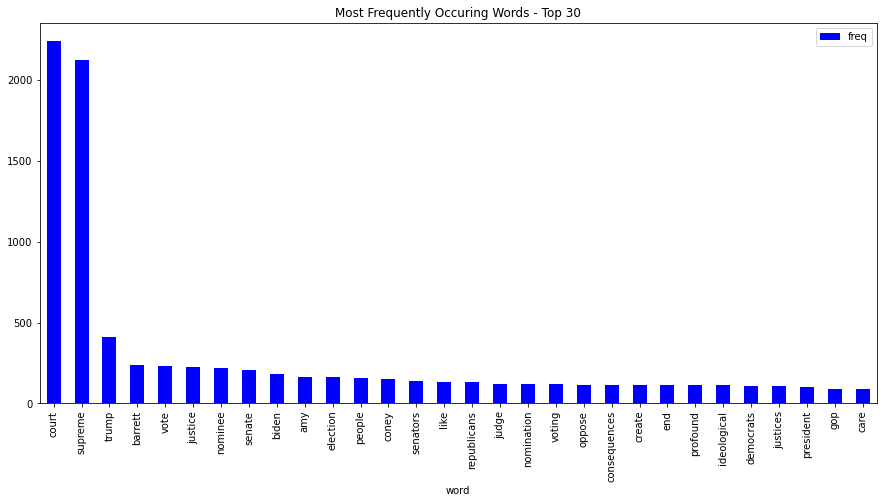

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

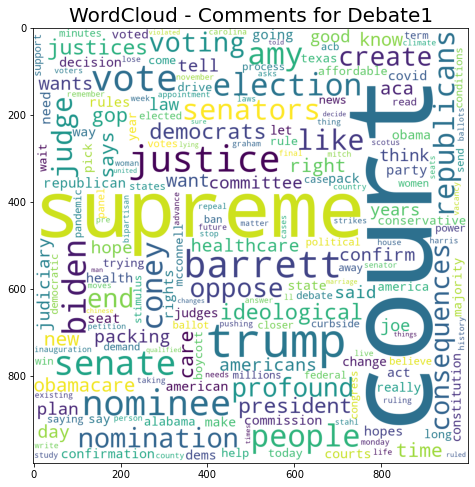

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

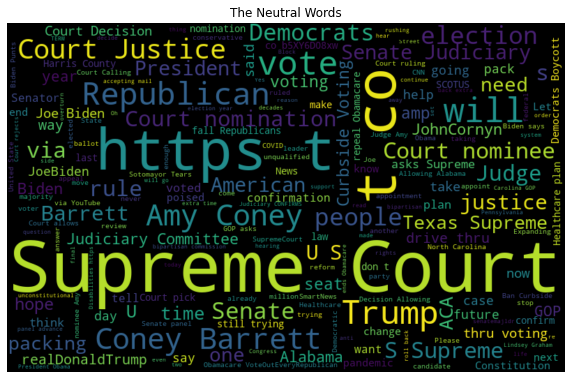

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

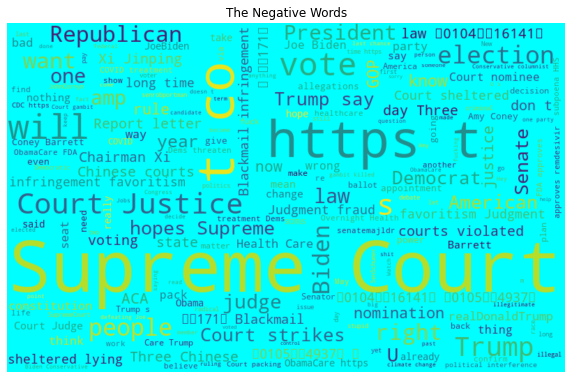

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

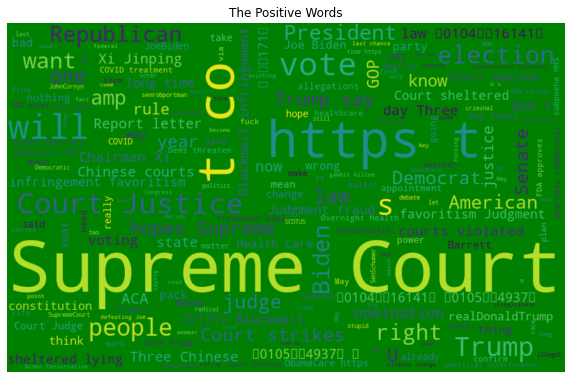

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,@RBReich The participation by any judge to be ...,Neutral
1,"@JohnCornyn Imagine after being a lawyer, an A...",Neutral
2,"Read and listen....over 7,000 lawyers OPPOSE A...",Neutral
3,Tell your senators you oppose Trump's Supreme ...,Positive
4,@SenatorCollins signed an Amicus brief asking ...,Neutral
...,...,...
1995,Sotomayor Tears into 5-3 Supreme Court Decisio...,Neutral
1996,@realDonaldTrump Sad day for America. A Suprem...,Negative
1997,"Next to Trump losing, what is the one thing th...",Negative
1998,"@michaelharriot Trump: ""I hope that they end i...",Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,the participation by any judge to be a part of...
1,Neutral,imagine after being a lawyer an ag a judge and...
2,Neutral,read and listen over lawyers oppose amy barret...
3,Positive,tell your senators you oppose trump s supreme ...
4,Neutral,signed an amicus brief asking the supreme cour...
...,...,...
1995,Neutral,sotomayor tears into supreme court decision al...
1996,Negative,sad day for america a supreme court that repre...
1997,Negative,next to trump losing what is the one thing tha...
1998,Neutral,trump i hope that they end it trump on minutes...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
3,Positive,tell your senators you oppose trump s supreme ...
7,Positive,tell your senators you oppose trump s supreme ...
9,Positive,amy coney barrett supreme court nomination mov...
10,Positive,in obama wanted to elect a democrat into supre...
13,Positive,saying quiet part really loud trump admits he ...
...,...,...
1980,Negative,trump says he hopes supreme court strikes down...
1988,Negative,the answer to craven republican manipulation o...
1991,Negative,years experience as a judge makes her deserve ...
1996,Negative,sad day for america a supreme court that repre...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
3,1,tell your senators you oppose trump s supreme ...
7,1,tell your senators you oppose trump s supreme ...
9,1,amy coney barrett supreme court nomination mov...
10,1,in obama wanted to elect a democrat into supre...
13,1,saying quiet part really loud trump admits he ...
...,...,...
1980,0,trump says he hopes supreme court strikes down...
1988,0,the answer to craven republican manipulation o...
1991,0,years experience as a judge makes her deserve ...
1996,0,sad day for america a supreme court that repre...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(990, 2)
(330, 2)


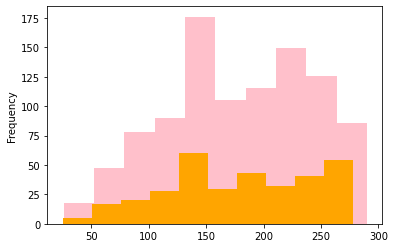

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(407848, 626200)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('deliberation', 0.6495379209518433),
 ('supremecourtconfirmation', 0.6446031332015991),
 ('multiple', 0.6393178701400757),
 ('leslie', 0.6391028165817261),
 ('careful', 0.6367981433868408),
 ('hypocrisy', 0.6327464580535889),
 ('donaldrump', 0.6296004056930542),
 ('blocking', 0.6205797791481018),
 ('watered', 0.6156920194625854),
 ('pelicanbrief', 0.6124907732009888)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('vote', -0.3095073103904724),
 ('gone', -0.32800716161727905),
 ('keep', -0.3332023024559021),
 ('election', -0.33950579166412354),
 ('time', -0.3398132920265198),
 ('packing', -0.3440971076488495),
 ('senate', -0.34635448455810547),
 ('him', -0.3465431332588196),
 ('pack', -0.34858134388923645),
 ('last', -0.35198095440864563)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(990, 500)
(990,)
(330, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.47575757575757577
F1 score : 0.5286103542234333
[[ 60  31]
 [142  97]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9959595959595959
Validation Accuracy : 0.4090909090909091
f1 score : 0.43478260869565216
[[ 60  31]
 [164  75]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4090909090909091
f1 score : 0.4628099173553719
[[ 51  40]
 [155  84]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9282828282828283
Validation Accuracy : 0.7242424242424242
f1 score : 0.8400702987697716
[[  0  91]
 [  0 239]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 tell your senators you oppose trump s supreme court nominee who could have profound consequences and create a more ideological supreme court via af 

First sample after preprocessing: 
 [48 22 43 10 50 15  8  3  2 34 28 39 18 56 53  6 51  5 24 59  3  2 36 57
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6373 - accuracy: 0.6981 - val_loss: 0.6013 - val_accuracy: 0.7071
Epoch 2/20
7/7 - 1s - loss: 0.5983 - accuracy: 0.7104 - val_loss: 0.5920 - val_accuracy: 0.7071
Epoch 3/20
7/7 - 1s - loss: 0.5849 - accuracy: 0.7104 - val_loss: 0.5837 - val_accuracy: 0.7071
Epoch 4/20
7/7 - 1s - loss: 0.5725 - accuracy: 0.7104 - val_loss: 0.5733 - val_accuracy: 0.7071
Epoch 5/20
7/7 - 1s - loss: 0.5557 - accuracy: 0.7104 - val_loss: 0.5592 - val_accuracy: 0.7071
Epoch 6/20
7/7 - 1s - loss: 0.5343 - accuracy: 0.7104 - val_loss: 0.5453 - val_accuracy: 0.7071
Epoch 7/20
7/7 - 1s - loss: 0.5058 - accuracy: 0.7104 - val_loss: 0.5308 - val_accuracy: 0.7071
Epoch 8/20
7/7 - 1s - loss: 0.4717 - accuracy: 0.7205 - val_loss: 0.5215 - val_accuracy: 0.7172
Epoch 9/20
7/7 - 1s - loss: 0.4295 - accuracy: 0.7710 - val_loss: 0.5211 - val_accuracy: 0.7172
Epoch 10/20
7/7 - 1s - loss: 0.3907 - accuracy: 0.8339 - val_loss: 0.5298 - val_accuracy: 0.7172
Epoch 11/20
7/7 - 1s - loss: 0.3380 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,the participation by any judge to be a part of...
1,-1,imagine after being a lawyer an ag a judge and...
2,-1,read and listen over lawyers oppose amy barret...
3,1,tell your senators you oppose trump s supreme ...
4,-1,signed an amicus brief asking the supreme cour...
...,...,...
1995,-1,sotomayor tears into supreme court decision al...
1996,0,sad day for america a supreme court that repre...
1997,0,next to trump losing what is the one thing tha...
1998,-1,trump i hope that they end it trump on minutes...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.524
F1 score : [0.55670103 0.23529412 0.57983193]
[[108   7  56]
 [ 31  16  41]
 [ 78  25 138]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9
Validation Accuracy : 0.494
f1 score : [0.4691358  0.29665072 0.59957173]
[[ 76  47  48]
 [ 19  31  38]
 [ 58  43 140]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.486
f1 score : [0.3877551  0.21518987 0.61678832]
[[ 57  29  85]
 [ 18  17  53]
 [ 48  24 169]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8346666666666667
Validation Accuracy : 0.574
f1 score : [0.54320988 0.         0.67687075]
[[ 88   0  83]
 [ 23   0  65]
 [ 42   0 199]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['wow what a joke that statement is he smells the hair of kids likes them rubbing the hair on his legs and did nothing for years in politics so stfu dumb ass trump lowest unemployment in us history for women prior to covid nominates a female supreme court justice stfu', 'if trump the gop is so confident about their hidden vote silent majority then why the rush to place barrett in the supreme court the usps sabotage the voter suppression the lack of action evolving russian interference the lawsuits against the states etc etc', 'sen exec cal p amy coney barrett of indiana to be an associate justice of the supreme court of the united states vice ruth bader ginsburg deceased oct reported by mr graham committee on the judiciary', 'end lifetime appointments to the supreme court', 'it would never reach the court if you can t sue an entity it would never reach the docket do you think that the supreme court accepts every case that is filed with them do you t

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.5156 - accuracy: 0.1978 - val_loss: 0.3063 - val_accuracy: 0.1667
Epoch 2/20
11/11 - 2s - loss: 0.4093 - accuracy: 0.1963 - val_loss: 0.2416 - val_accuracy: 0.1667
Epoch 3/20
11/11 - 2s - loss: 0.3815 - accuracy: 0.1963 - val_loss: 0.2995 - val_accuracy: 0.1667
Epoch 4/20
11/11 - 2s - loss: 0.3592 - accuracy: 0.1963 - val_loss: 0.2599 - val_accuracy: 0.1667
Epoch 5/20
11/11 - 2s - loss: 0.2845 - accuracy: 0.1963 - val_loss: 0.1171 - val_accuracy: 0.1667
Epoch 6/20
11/11 - 2s - loss: 0.0856 - accuracy: 0.2281 - val_loss: -1.1063e-01 - val_accuracy: 0.2067
Epoch 7/20
11/11 - 2s - loss: -3.6115e-01 - accuracy: 0.2741 - val_loss: -7.9991e-01 - val_accuracy: 0.2667
Epoch 8/20
11/11 - 2s - loss: -1.5846e+00 - accuracy: 0.3200 - val_loss: -2.6136e+00 - val_accuracy: 0.2933
Epoch 9/20
11/11 - 2s - loss: -4.3333e+00 - accuracy: 0.3281 - val_loss: -6.6375e+00 - val_accuracy: 0.3400
Epoch 10/20
11/11 - 2s - loss: -1.0300e+01 - accuracy: 0.3519 - val_loss: -1.4527e+